In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import charset_normalizer
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/list-of-companies-in-india/list-of-companies-in-India.csv


In [2]:
companies = pd.read_csv('/kaggle/input/list-of-companies-in-india/list-of-companies-in-India.csv')

In [3]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10060 entries, 0 to 10059
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       10060 non-null  int64  
 1   name             10060 non-null  object 
 2   rating           10060 non-null  float64
 3   reviews          10060 non-null  object 
 4   company_details  10060 non-null  object 
 5   salaries         10060 non-null  object 
 6   interviews       10060 non-null  object 
 7   jobs             10060 non-null  object 
 8   benefits         10060 non-null  object 
 9   rated_for        10060 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 786.1+ KB


Majority of the columns are of object datatype.

In [4]:
companies.head()

,Unnamed: 0,name,rating,reviews,company_details,salaries,interviews,jobs,benefits,rated_for
0,0,TCS,3.8,67.2k,IT Services & Consulting | 1 Lakh+ Employees |...,736.6k,5.6k,303,11.3k,"Highly Rated For Job Security, Work Life Balan..."
1,1,Accenture,4.0,42.9k,IT Services & Consulting | 1 Lakh+ Employees |...,513.6k,4k,4.4k,7k,"Highly Rated For Job Security, Work Life Balan..."
2,2,Cognizant,3.9,38.6k,IT Services & Consulting | 1 Lakh+ Employees |...,496.6k,3.3k,492,5.8k,"Highly Rated For Job Security, Work Life Balan..."
3,3,Wipro,3.8,35.7k,IT Services & Consulting | 1 Lakh+ Employees |...,371k,3.3k,353,4.9k,"Highly Rated For Job Security, Work Life Balan..."
4,4,ICICI Bank,4.0,31.1k,Banking | 1 Lakh+ Employees | Public | 29 year...,135.9k,1.7k,216,3.7k,"Highly Rated For Job Security, Work Life Balan..."


In [9]:
columns = ['interviews', 'reviews', 'salaries', 'jobs', 'benefits']

for col in columns:
    companies[col] = companies[col].map(lambda a: float(a.strip('k')) * 1000 if 'k' in a else float(a))

In [10]:
companies.head()

,Unnamed: 0,name,rating,reviews,company_details,salaries,interviews,jobs,benefits,rated_for
0,0,TCS,3.8,67200.0,IT Services & Consulting | 1 Lakh+ Employees |...,736600.0,5600.0,303.0,11300.0,"Highly Rated For Job Security, Work Life Balan..."
1,1,Accenture,4.0,42900.0,IT Services & Consulting | 1 Lakh+ Employees |...,513600.0,4000.0,4400.0,7000.0,"Highly Rated For Job Security, Work Life Balan..."
2,2,Cognizant,3.9,38600.0,IT Services & Consulting | 1 Lakh+ Employees |...,496600.0,3300.0,492.0,5800.0,"Highly Rated For Job Security, Work Life Balan..."
3,3,Wipro,3.8,35700.0,IT Services & Consulting | 1 Lakh+ Employees |...,371000.0,3300.0,353.0,4900.0,"Highly Rated For Job Security, Work Life Balan..."
4,4,ICICI Bank,4.0,31100.0,Banking | 1 Lakh+ Employees | Public | 29 year...,135900.0,1700.0,216.0,3700.0,"Highly Rated For Job Security, Work Life Balan..."


In [11]:
companies.describe()

,Unnamed: 0,rating,reviews,salaries,interviews,jobs,benefits
count,10060.000000,10060.00000,10060.000000,10060.000000,10060.000000,10060.000000,10060.000000
mean,5029.500000,3.88500,27080.000000,230900.000000,2190.350000,682.650000,3935.000000
std,2904.216188,0.12758,11928.107273,185061.863611,1341.928735,918.716402,2155.165122
min,0.000000,3.60000,15900.000000,49200.000000,531.000000,108.000000,1500.000000
25%,2514.750000,3.80000,18675.000000,88675.000000,1100.000000,251.250000,2650.000000
50%,5029.500000,3.90000,24700.000000,156400.000000,1750.000000,398.000000,3550.000000
75%,7544.250000,4.00000,30875.000000,345500.000000,3225.000000,695.000000,4300.000000
max,10059.000000,4.10000,67200.000000,736600.000000,5600.000000,4400.000000,11300.000000


In [12]:
del companies['Unnamed: 0']#column is not needed for analysis

Grouping numerical columns to check correlations

In [13]:
numerical = companies.select_dtypes(exclude='object')

Text(0.5, 1.0, 'Correlations')

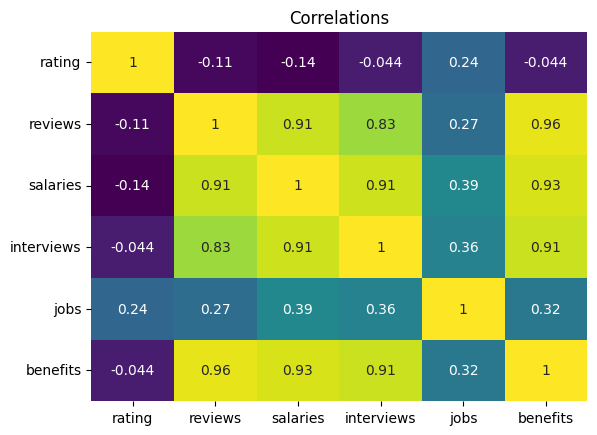

In [14]:
sns.heatmap(numerical.corr(),cmap='viridis',cbar=False,annot=True)
plt.title('Correlations')

Strong correlations between reviews and salaries, reviews and interviews, reviews and benefits, salaries and interviews, salaries and benefits, interviews and benefits

A strong correlation means that most likely the increase of one variable has significant influence on the other variable.

In [16]:
companies.groupby('company_details')['rating'].agg('mean')

company_details
BPO | 50k-1 Lakh Employees | Forbes Global 2000 | 45 years old | Paris +140 more                                     3.6
BPO | 50k-1 Lakh Employees | Public | 40 years old | Fremont +97 more                                                3.9
Banking | 1 Lakh+ Employees | Public | 29 years old | Mumbai +1224 more                                              4.0
Banking | 1 Lakh+ Employees | Public | 29 years old | Mumbai +1462 more                                              3.9
Banking | 50k-1 Lakh Employees | Public | 30 years old | Mumbai +1246 more                                           3.8
Engineering & Construction | 10k-50k Employees | Public | 85 years old | Mumbai +600 more                            4.0
IT Services & Consulting | 1 Lakh+ Employees | Forbes Global 2000 | 29 years old | Teaneck. New Jersey. +126 more    3.9
IT Services & Consulting | 1 Lakh+ Employees | Public | 26 years old | New York +89 more                             3.9
IT Services & Co

Extracting the age of the company from 'company_details' column and creating a new column with the data.

In [33]:
companies['company_age'] = companies['company_details'].str.extract('(\d+) years old')

Text(0, 0.5, 'Frequency')

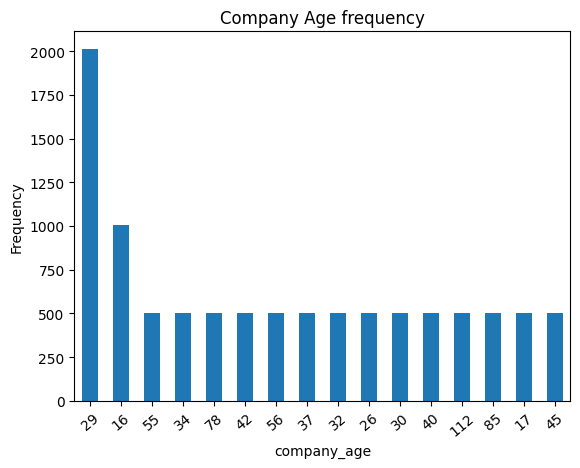

In [38]:
companies['company_age'].value_counts().plot(kind='bar')
plt.title('Company Age frequency')
plt.xticks(rotation = 40)
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Company Age and Mean Number of Jobs')

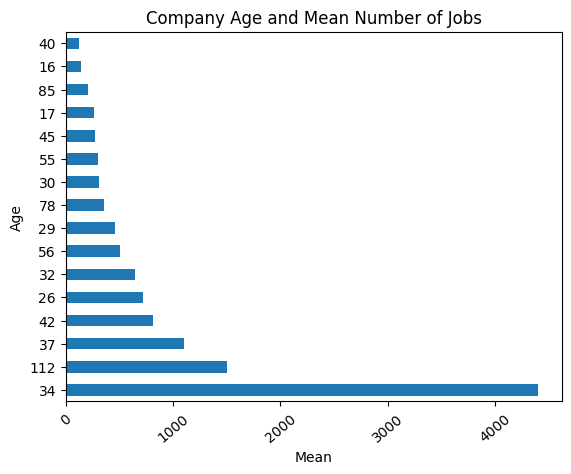

In [46]:
companies.groupby('company_age')['jobs'].agg('mean').sort_values(ascending=False).plot.barh()
plt.ylabel('Age')
plt.xlabel('Mean')
plt.xticks(rotation=40)
plt.title('Company Age and Mean Number of Jobs')

In [57]:
public = np.where(companies['company_details'].str.contains('Public'))
companies.iloc[public].count()

name               8048
rating             8048
reviews            8048
company_details    8048
salaries           8048
interviews         8048
jobs               8048
benefits           8048
rated_for          8048
age                8048
company_age        8048
dtype: int64

In [55]:
companies.shape[0]

10060

8048 of 10060 are public companies.

In [63]:
x = companies['company_details'].map(lambda a: a if 'Public' not in a else None)

In [64]:
x.count()#2012 are private companies.

2012

In [68]:
companies_private = companies[x==companies['company_details']]
companies_public = companies[~(x==companies['company_details'])]

In [71]:
print('private companies mean number of jobs: {}' .format(companies_private.jobs.mean()))

private companies mean number of jobs: 284.5


In [70]:
print('public companies mean number of jobs: {}' .format(companies_public.jobs.mean()))

public companies mean number of jobs: 782.1875


In [74]:
print('private companies average rating: {}' .format(companies_private.rating.mean()))

private companies average rating: 3.85


In [75]:
print('public companies average rating: {}' .format(companies_public.rating.mean()))

public companies average rating: 3.89375


In [79]:
print('private companies average salary: {}' .format(format(companies_private.salaries.mean(),',')))

private companies average salary: 168,725.0


In [80]:
print('public companies average salary: {}' .format(format(companies_public.salaries.mean(),',')))

public companies average salary: 246,443.75
